# Setup

In [2]:
import scipy.io

# prereqs import
import pandas as pd
import numpy as np
import math
import re
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

# load matlab data
mat = scipy.io.loadmat('matlab/emnist-balanced')
mat.keys()
data = mat['dataset']

# see page 4 of the paper on emnist
# uncertain what 3rd entry is in dataset
X_train = data['train'][0,0]['images'][0,0]
y_train = data['train'][0,0]['labels'][0,0]
X_test = data['test'][0,0]['images'][0,0]
y_test = data['test'][0,0]['labels'][0,0]

# try proccessing data (pixel values from EMINST are not normalized, 0-255)
def rescale_DivideBy255(inputData):
    outputArray = []
    for i in range(len(inputData)):
        outputArray.append(inputData[i]/255)

    return outputArray

X_train_normalized = rescale_DivideBy255(X_train)
X_test_normalized = rescale_DivideBy255(X_test)

train_data = X_train_normalized
train_target = y_train
test_data = X_test_normalized
test_target = y_test

In [3]:
# use ski kit learns kcv method -> cross_val_score, take return type and get .mean()
# most of the code throws warnings unless specifically ignore
import warnings
warnings.filterwarnings('ignore')

# Test NN

In [3]:
from sklearn import neural_network
testNN = neural_network.MLPClassifier(hidden_layer_sizes=(1,))
testNN.fit(train_data,train_target)

MLPClassifier(hidden_layer_sizes=(1,))

In [4]:
# cv=2> results in kfold split using (Stratified)KFold/KFold from scikit learn
from sklearn.model_selection import cross_val_score
scores = cross_val_score(testNN,train_data,train_target,cv=2)

In [5]:
#average accuracy across kfold cv
scores.mean()

0.07680851063829788

In [6]:
testNN.score(train_data,train_target)

0.06644503546099291

In [7]:
# save(pickle) the model for later. Save to disk
from joblib import dump,load
dump(testNN,'testPickleNN.joblib') #file name will be put in same folder as this notebook

['testPickleNN.joblib']

## Test loading pickled model

In [8]:
# test load pickeld model from disk
from joblib import load
testNN_2 = load('testPickleNN.joblib')
testNN_2.score(train_data,train_target)

0.06644503546099291

# E0 - mock experiment scafold

### E0 - Setup

In [7]:
# setup global file names
# change these names to be unique
store_models_name = 'e0_simpleLayers_models.joblib'
store_results_name = 'e0_simpleLayers_results.joblib'

In [8]:
# define hyper parameter
# hidden_layer_sizes, naive experiment for fast demonstration of scafold
hp = [(1,),(2,),(3,)]

### E0 - training

In [6]:
# train models
from sklearn import neural_network

trainedModels = []

for cur_hp in hp:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=cur_hp)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)

In [7]:
# store models
from joblib import dump
dump(trainedModels,store_models_name)

['e0_simpleLayers_models.joblib']

### E0 - Model Evaluation

In [4]:
# evaulate models
from joblib import load
from sklearn.model_selection import cross_val_score

result_y = []
load_trainedModels = load(store_models_name)
for i in range(len(load_trainedModels)):
    result_y.append(cross_val_score(load_trainedModels[i],X=train_data,y=train_target,cv=5).mean())

In [5]:
# store results
from joblib import dump
dump(result_y,store_results_name)

['e0_simpleLayers_results.joblib']

## E0 - Plot

In [9]:
# setup variables
from joblib import load

# get kfold accuracies for y axis
plot_y = load(store_results_name)

# Set x points to number of nodes in the first(and only) hidden layer
plot_x = [item[0] for item in hp]

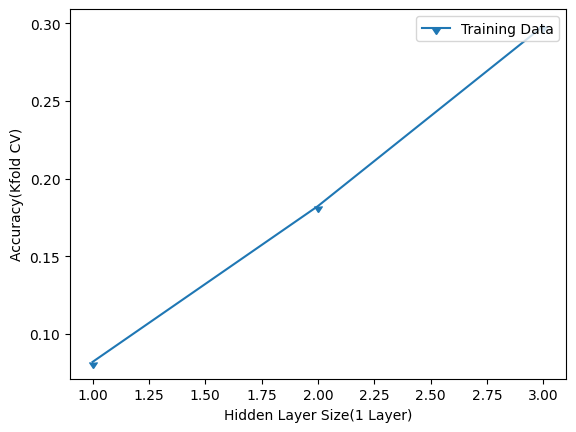

In [10]:
# plot
fig, ax = plt.subplots()
ax.set_xlabel("Hidden Layer Size(1 Layer)")
ax.set_ylabel("Accuracy(Kfold CV)")
ax.plot(plot_x, plot_y,label="Training Data",marker=11)
ax.legend(loc='upper right')
plt.show()

## experimental plot - epoch number

In [ ]:
errors = np.array(result_iter_number, dtype="object")
errors = errors.T
xVals=[]
yVals=[]
for val in errors[0]:
    xVals.append(val)
for val in errors[1]:
    yVals.append(val)

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel("Iteration Number")
ax.set_ylabel("Accuracy(Kfold CV)")
ax.plot(xVals, yVals,label="Training Data",marker=11)
ax.legend(loc='upper right')
plt.show()

[[...], [...], [...]]

# Experiment - Layer configuration

## Repeated additional layers of size 100

In [ ]:
hp_hidden_layers = [(100,), (100,100), (100,100,100), (100,100,100,100)]

In [ ]:
# run experiment
from sklearn import neural_network
from sklearn.model_selection import cross_val_score

trainedModels = []
result = []
store_name = 'e2_repeated_layer_numbers.joblib'

for cur_hidden_layer in hp_hidden_layers:
    nn_characterClassifier = neural_network.MLPClassifier(hidden_layer_sizes=cur_hidden_layer)
    nn_characterClassifier.fit(train_data,train_target)
    trainedModels.append(nn_characterClassifier)
    result.append([len(cur_hidden_layer),cross_val_score(nn_characterClassifier,X=train_data,y=train_target,cv=5).mean()])

In [ ]:
dump(trainedModels,store_name)